L'idée de ce notebook est de proposer un exemple dans lequel la méthode proposée dans l'article de Li ne fonctionne pas. 

Nous avons considéré ici des signaux avec les mêmes matrices de variance covariance empiriques : les représentants des clusters sont donc les mêmes et il n'est pas possible d'actualiser les clusters. 

Cependant ces signaux sont assez différents (celui basé sur une loi exponentielle prend des valeurs "extrêmes" uniquement de manière positive.

On montre qu'un $k$ means basé sur la DTW multivariée permet d'avoir des meilleurs résultats. 

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from methods import *

In [88]:
M = 15
n = 1000

In [89]:
#calcul d'une base orthonormée de R^m aléatoire

X = np.random.random((n,M))
S = X.T @ X
U,_,_ = np.linalg.svd(S)

diago = np.random.choice(range(2,4),M)
#
sigma = U @ np.diag(diago) @ U.T

In [90]:
sigma_sqrt = U @ np.diag(diago**(0.5)) @ U.T

In [91]:
def inv_sqrt(M):
    U,S,V = np.linalg.svd(M)
    return U @ np.diag(S**(-0.5)) @ V

In [92]:
U = np.random.uniform(-np.sqrt(3), np.sqrt(3), size = (M,n))

U = (U.T - U.mean(axis = 1)).T
U = inv_sqrt((U @ U.T)/(U.shape[1])) @ U

U = (sigma_sqrt @ U)


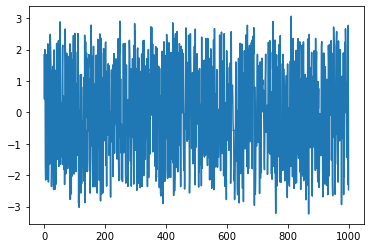

In [93]:
plt.plot(np.arange(n),U[0,:])

In [94]:
N = np.random.normal(0,1, size = (M,n))

N = (N.T - N.mean(axis = 1)).T
N = inv_sqrt((N @ N.T)/(N.shape[1])) @ N

N = (sigma_sqrt @ N)

N.shape

(15, 1000)

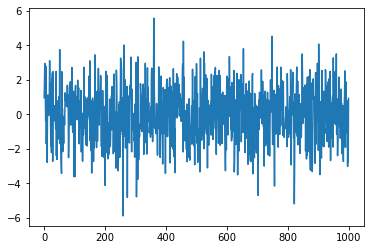

In [95]:
plt.plot(np.arange(n),N[0,:])

In [96]:
E = np.random.exponential(1, size = (M,n))

E = (E.T - E.mean(axis = 1)).T
E = inv_sqrt((E @ E.T)/(E.shape[1])) @ E

E = (sigma_sqrt @ E)



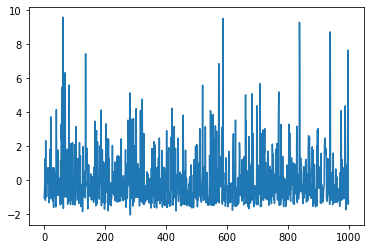

In [97]:
plt.plot(np.arange(n),E[1,:])

In [113]:
N = 100

MTS_U = []

for i in range(N):
    U = np.random.uniform(-np.sqrt(3), np.sqrt(3), size = (M,n))
    U = (U.T - U.mean(axis = 1)).T
    U = inv_sqrt((U @ U.T)/(U.shape[1])) @ U
    U = (sigma_sqrt @ U)
    MTS_U.append(MTS(U.T))

# U = np.random.uniform(-np.sqrt(3), np.sqrt(3), size = (M,n))
# U = (U.T - U.mean(axis = 1)).T
# U = inv_sqrt((U @ U.T)/(U.shape[1])) @ U
# U = (sigma_sqrt @ U)
# MTS_U = [MTS(U.T)]*N

In [114]:
MTS_N = []

for i in range(N):
    N1 = np.random.normal(0,1, size = (M,n))
    N1 = (N1.T - N1.mean(axis = 1)).T
    N1 = inv_sqrt((N1 @ N1.T)/(N1.shape[1])) @ N1
    N1 = (sigma_sqrt @ N1)
    MTS_N.append(MTS(N1.T))



# N1 = np.random.normal(0,1, size = (M,n))
# N1 = (N1.T - N1.mean(axis = 1)).T
# N1 = inv_sqrt((N1 @ N1.T)/(N1.shape[1])) @ N1
# N1 = (sigma_sqrt @ N1)
# MTS_N = [MTS(N1.T)]*N

In [115]:
MTS_E = []

for i in range(N):
    E = np.random.exponential(1, size = (M,n))
    E = (E.T - E.mean(axis = 1)).T
    E = inv_sqrt((E @ E.T)/(E.shape[1])) @ E
    E = (sigma_sqrt @ E)
    MTS_E.append(MTS(E.T))

# E = np.random.exponential(1, size = (M,n))
# E = (E.T - E.mean(axis = 1)).T
# E = inv_sqrt((E @ E.T)/(E.shape[1])) @ E
# E = (sigma_sqrt @ E)
# MTS_E = [MTS(E.T)]*N


In [116]:
MTS_tot = MTS_U + MTS_N + MTS_E

In [117]:
label = np.repeat([0,1,2],N)

In [118]:
shuffle_index = np.random.choice(3*N, replace = False, size = 3*N)

In [119]:
MTS_tot_shuffle = []

In [120]:
for i in shuffle_index:
    MTS_tot_shuffle.append(MTS_tot[i])

In [121]:
label_shuffle = label[shuffle_index]

In [122]:
m = Mc2PCA(3,4)
m.fit(MTS_tot_shuffle)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [123]:
from tslearn.clustering import TimeSeriesKMeans

In [124]:
dtw_clustering = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=1000,random_state=0)

In [125]:
MTS_for_tslearn = np.stack([elem.ts for elem in MTS_tot_shuffle])

In [126]:
dtw_clustering.fit_predict(MTS_for_tslearn)

array([2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2,
       2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2,
       2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2], d